# MNA - NLP - Solución para el Profesor

Actividad Semanas 6 y 7

Modelos LSI y LDA


In [1]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\L00574111\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
import json, re
import pandas as pd 
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import ToktokTokenizer

# Pregunta 1:

Descarga el archivo noticiasTopicModeling.txt que se encuentra en Canvas. Este archivo consiste en 5658 noticias de varios periódicos de España. 

El archivo de texto es una lista en el siguiente formato:
 [{“titular”:”Encabezado“, “texto”:”Cuerpo”}, … , {“titular”:”Encabezado”,”texto”:”Cuerpo”}] 

donde “titular” es el encabezado de la noticia y “texto” es el cuerpo del texto de dicha noticia. 

En particular en esta actividad trabajarás solamente con los cuerpos de las noticias, sin incluir los encabezados. 

Carga dicho archivo y genera un DataFrame de Pandas llamado “df” y que contiene una única columna llamada “noticia” con 5658 renglones formados por los cuerpos de las noticias. 


In [3]:
with open('noticiasTopicModeling.txt') as json_file:
    datos = json.load(json_file)
    
tuplas = list(zip([noticia.get("titular") for noticia in datos],
                  [noticia.get("texto") for noticia in datos]))

df = pd.DataFrame(tuplas, columns =['Titular', 'Noticia'])
print(df.shape)
df.head()

(5658, 2)


,Titular,Noticia
0,Vox se sube a la ola de la extrema derecha eur...,"""España ha dejado de ser católica"", decía Manu..."
1,Mensajes xenófobos de Vox y la cancelación de ...,El clima de crispación social en Ceuta ha lleg...
2,El Gobierno alega el estado de alarma para no ...,El Gobierno ha alegado la suspensión de plazos...
3,La fiscala,"Puedes mandar tu pregunta, sugerencia o queja ..."
4,La CorteIDH pide a Panamá informe sobre migran...,Panamá debe entregar esta semana a la Corte In...


# Pregunta - 2:

Realiza un proceso de limpieza. 

Aplica el preprocesamiento que consideres adecuado para texto en español. 

Recuerda que el objetivo es identificar los tokens que describan mejor la distribución de cada tema. 

In [4]:
def limpiar_texto(texto):
    """
    Función para realizar la limpieza de un texto dado.... cada alumno/equipo puede proponer su propio proceso de limpieza.
    """
    # Eliminamos los caracteres especiales
    texto = re.sub(r'\W', ' ', str(texto))
    # Eliminado las palabras que tengan un solo caracter
    texto = re.sub(r'\s+[a-zA-Z]\s+', ' ', texto)
    # Sustituir los espacios en blanco en uno solo
    texto = re.sub(r'\s+', ' ', texto, flags=re.I)
    # Convertimos textos a minusculas
    texto = texto.lower()
    return texto

In [5]:
df["Tokens"] = df.Noticia.apply(limpiar_texto)
df.head()

,Titular,Noticia,Tokens
0,Vox se sube a la ola de la extrema derecha eur...,"""España ha dejado de ser católica"", decía Manu...",españa ha dejado de ser católica decía manuel...
1,Mensajes xenófobos de Vox y la cancelación de ...,El clima de crispación social en Ceuta ha lleg...,el clima de crispación social en ceuta ha lleg...
2,El Gobierno alega el estado de alarma para no ...,El Gobierno ha alegado la suspensión de plazos...,el gobierno ha alegado la suspensión de plazos...
3,La fiscala,"Puedes mandar tu pregunta, sugerencia o queja ...",puedes mandar tu pregunta sugerencia queja tra...
4,La CorteIDH pide a Panamá informe sobre migran...,Panamá debe entregar esta semana a la Corte In...,panamá debe entregar esta semana la corte inte...


In [6]:
tokenizer = ToktokTokenizer() 
df["Tokens"] = df.Tokens.apply(tokenizer.tokenize)
df.head()

,Titular,Noticia,Tokens
0,Vox se sube a la ola de la extrema derecha eur...,"""España ha dejado de ser católica"", decía Manu...","[españa, ha, dejado, de, ser, católica, decía,..."
1,Mensajes xenófobos de Vox y la cancelación de ...,El clima de crispación social en Ceuta ha lleg...,"[el, clima, de, crispación, social, en, ceuta,..."
2,El Gobierno alega el estado de alarma para no ...,El Gobierno ha alegado la suspensión de plazos...,"[el, gobierno, ha, alegado, la, suspensión, de..."
3,La fiscala,"Puedes mandar tu pregunta, sugerencia o queja ...","[puedes, mandar, tu, pregunta, sugerencia, que..."
4,La CorteIDH pide a Panamá informe sobre migran...,Panamá debe entregar esta semana a la Corte In...,"[panamá, debe, entregar, esta, semana, la, cor..."


In [7]:
STOPWORDS = set(stopwords.words("spanish"))    

def filtrar_stopword_digitos(tokens):
    """
    Filtra stopwords y digitos de una lista de tokens.
    """
    return [token for token in tokens if token not in STOPWORDS 
            and not token.isdigit()]

df["Tokens"] = df.Tokens.apply(filtrar_stopword_digitos)
df.head()

,Titular,Noticia,Tokens
0,Vox se sube a la ola de la extrema derecha eur...,"""España ha dejado de ser católica"", decía Manu...","[españa, dejado, ser, católica, decía, manuel,..."
1,Mensajes xenófobos de Vox y la cancelación de ...,El clima de crispación social en Ceuta ha lleg...,"[clima, crispación, social, ceuta, llegado, pu..."
2,El Gobierno alega el estado de alarma para no ...,El Gobierno ha alegado la suspensión de plazos...,"[gobierno, alegado, suspensión, plazos, deriva..."
3,La fiscala,"Puedes mandar tu pregunta, sugerencia o queja ...","[puedes, mandar, pregunta, sugerencia, queja, ..."
4,La CorteIDH pide a Panamá informe sobre migran...,Panamá debe entregar esta semana a la Corte In...,"[panamá, debe, entregar, semana, corte, intera..."


In [9]:
stemmer = SnowballStemmer("spanish")                            # tarda 1 min aprox

def stem_palabras(tokens):
    """
    Reduce cada palabra de una lista dada a su raíz.
    """
    return [stemmer.stem(token) for token in tokens]
 
df["Tokens"] = df.Tokens.apply(stem_palabras)

df.head()

,Titular,Noticia,Tokens
0,Vox se sube a la ola de la extrema derecha eur...,"""España ha dejado de ser católica"", decía Manu...","[españ, dej, ser, catol, dec, manuel, azañ, co..."
1,Mensajes xenófobos de Vox y la cancelación de ...,El clima de crispación social en Ceuta ha lleg...,"[clim, crispacion, social, ceut, lleg, punt, p..."
2,El Gobierno alega el estado de alarma para no ...,El Gobierno ha alegado la suspensión de plazos...,"[gobiern, aleg, suspension, plaz, deriv, decl,..."
3,La fiscala,"Puedes mandar tu pregunta, sugerencia o queja ...","[pued, mand, pregunt, sugerent, quej, trav, fo..."
4,La CorteIDH pide a Panamá informe sobre migran...,Panamá debe entregar esta semana a la Corte In...,"[panam, deb, entreg, sem, cort, interameric, d..."


# Pregunta - 3: 

¿Por qué en este caso no requerimos hacer una partición en entrenamiento, validación y prueba?

Terminemos de preparar los datos en una lista de strings, donde cada string es una de las 5658 noticias

In [10]:
print(df.Tokens[0][0:10])   # Ya tenemos la tokenización en "palabras".

['españ', 'dej', 'ser', 'catol', 'dec', 'manuel', 'azañ', 'comienz', 'segund', 'republ']


In [11]:
X = df[['Tokens']]
X.shape   # dataFrame

(5658, 1)

In [12]:
import numpy as np

In [13]:
Xx = np.array(X)
Xx.shape

(5658, 1)

In [14]:
list(Xx[10])[0][0:10]   # cada noticia está ahorita como una lista de tokens-strings separados.

['trabaj',
 'españ',
 'necesit',
 'inmigr',
 'nadi',
 'inter',
 'condicion',
 'vid',
 'relator',
 'onu']

In [15]:
ddf = []

for k in range(Xx.shape[0]):
    st = list(Xx[k])[0]
    tmp = ' '.join(st)
    ddf.append(tmp)
    
len(ddf)

5658

In [16]:
ddf[0]   # ya tenemos un lista de noticias, donde cada noticia está en un solo string... esta es la primera de ellas.

'españ dej ser catol dec manuel azañ comienz segund republ aquel congr diput aprob ley laicist metafor dej ser catol papel ley creenci buen part puebl migracion integr europ program vox europ sab españ doming noviembr dej ser excepcion europ potenci extrem derech parlament metafor pues precis excepcional ten dictadur medi setent dictador aun mausol despu años muert exist tal cos portugal greci itali alemani pais dictadur fascist españ pas portugal itali alemani derrot fascism franquism mur cam harakiri cort franquist ruptur regim sin reform nac nuev pais sin pais mut ley ley aun asi españ parec vacun si años franquism sid bastant lleg irrupcion posfranqu tras ser actor fundamental gobi autonom local pp ciudad españ dej ser excepcion aunqu alianz popul manuel frag beb franquism sociolog fuerz nuev blas piñ bunk franquist aunqu franquism sociolog mantuv pp larg tiemp aunqu vox escision propi pp aunqu asi ciert nunc ahor españ reinstaur democrat exist fuerz extrem derech vot escañ fenom p

In [17]:
Xdf = np.array(ddf)
Xdf.shape

(5658,)

Listo, ya tenemos los comentarios como una lista o arreglo de numpy, pasemos a los modelos.

# Parte 1: Indexación semántica latente (LSI):

# Pregunta - 4:

Encontrar la matriz Tf-idf de la columna de noticias. 

Despliega los primeros 5 renglones con algunas de sus columnas con sus nombres, donde las columnas son los tokens. 

**¿Cuál es el significado de cada renglón? ¿Y el significado de cada columna?**

# Aquí empieza el otro archivo del JupNb del LSI (o LSA) con SVD

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

In [19]:
tfidf = TfidfVectorizer(lowercase=True, 
                        max_df=0.2,         # -------------- ignora las palabras con frecuencia mayor al 20% (opcional)
                        min_df=0.02         # -------------- ignora las palabras con frecuencia menor al 2%  (opcional)
                       )

In [20]:
tfidf_train_sparse = tfidf.fit_transform(ddf)     # csr_matrix de la DTM

# to Data Frame -- es decir, como matriz densa... solo si tienes RAM y es para visualizarla!!!
tfidf_train_df = pd.DataFrame(tfidf_train_sparse.toarray(), columns=tfidf.get_feature_names_out()) 

tfidf_train_df.head(5)

,abandon,abascal,abiert,abog,abon,abord,abraz,abre,abri,abril,...,washington,web,www,xunt,xx,york,zanj,zapat,zaragoz,zon
0,0.00000,0.080519,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.05089,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000
1,0.02793,0.040328,0.023193,0.056040,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.03868,0.0,0.0,0.000000
2,0.00000,0.000000,0.000000,0.044785,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000
3,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.059995,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000
4,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.034325


In [21]:
tfidf_train_df.shape

(5658, 2132)

In [22]:
# borrémos la matriz densa que no la necesitamos más:
del tfidf_train_df

# Pregunta - 5:

Aplica el método de descomposición de valores singulares truncado a la matriz Tf-idf anterior con 10 componentes y obtener el gráfico de la importancia relativa de estas. 

In [23]:
from sklearn.decomposition import TruncatedSVD
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
# Se define el objeto que aplicará SVD truncada con r=10 singular values
# No les dije en la tarea que usaran alguna semilla , así que los resultados
# serán en general diferentes... y además porque cada uno creo su propio texto limpio.
    

lsa_obj = TruncatedSVD(n_components=10, n_iter=100)  

tfidf_lsa_data = lsa_obj.fit_transform(tfidf_train_sparse)   # ndarray_(5658x10) ... se ajusta y aplica la SVD truncada
                                                             #                       a los datos de Train.

Sigma = lsa_obj.singular_values_     # ndarray_(10,)

V_T = lsa_obj.components_.T     # ndarray_(2911x10)  ... En este caso las 10 columnas serían 10 temas/topics encontrados
                                                   # Se deben ordenar las 2911 words/Terms de mayor a menor para obtener
                                                   # las keywords principales de cada tópico.

In [25]:
print(tfidf_lsa_data.shape)
print(Sigma.shape)
print(V_T.shape)

(5658, 10)
(10,)
(2132, 10)


In [26]:
vs = lsa_obj.singular_values_

vs 

array([16.86447607,  8.81984924,  8.30283823,  7.57555544,  7.32239139,
        7.01673039,  6.65166964,  6.23526656,  6.20064924,  6.05734527])

Vemos que los 10 valores singulares son bastante grandes todos, por lo que por este método

podemos decir que la cantidad de tópicos debieran de ser al menos 10 tópicos.

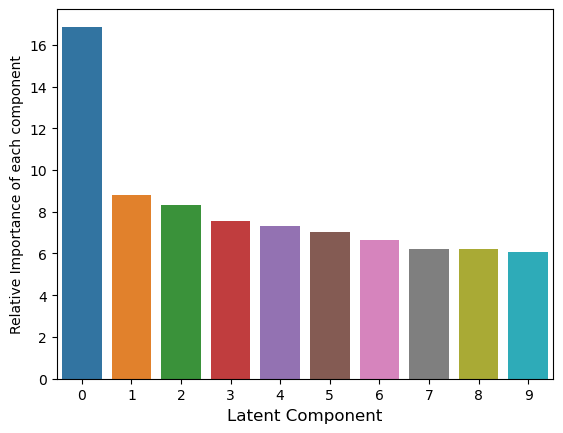

In [27]:
chart = sns.barplot(x=list(range(len(Sigma))), y = Sigma )
chart.set_xlabel('Latent Component', fontdict={'size': 12})
chart.set_ylabel('Relative Importance of each component', fontdict={'size': 10})
plt.show()

# Pregunta - 6:

Obtener la matriz tokens-temas (term-topic) a partir de la matriz V^T de la descomposición SVD. 

Despliega sus primeros 5 renglones donde se incluya el nombre de las columnas.

In [29]:
lsa_term_topic = V_T    # Esta es la matriz "term" (2132 words) contra "topic" (10 tópicos).  

In [30]:
lsa_term_topic.shape

(2132, 10)

In [31]:
tfidf.get_feature_names_out()   # aquí tenemos los nombres de todos los tokens...

array(['abandon', 'abascal', 'abiert', ..., 'zapat', 'zaragoz', 'zon'],
      dtype=object)

In [32]:
eda_traincolumnsnames = list(tfidf.get_feature_names_out())   # para que queden en una lista...

In [33]:
term_topic_matrix = pd.DataFrame(data=lsa_term_topic, 
                      index = eda_traincolumnsnames ,  # EDA: los datos de Train para relacionar los Terms(Words) con los Topics.
                      columns = [f'Latent_concept_{r}' for r in range(0,V_T.shape[1])]  # cada una de las "r" columnas son tópicos
                      )

print(term_topic_matrix.shape)   #  wordsxtopics:(2911x10)

(2132, 10)


In [36]:
[f'Latent_concept_{r}' for r in range(0,V_T.shape[1])]   # aquí tenemos los nombres de las columnas de los conceptos-latentes

['Latent_concept_0',
 'Latent_concept_1',
 'Latent_concept_2',
 'Latent_concept_3',
 'Latent_concept_4',
 'Latent_concept_5',
 'Latent_concept_6',
 'Latent_concept_7',
 'Latent_concept_8',
 'Latent_concept_9']

In [37]:
term_topic_matrix.head()    # Cada columna es un tópico (topic o Latent-Concept), donde se indican los pesos de cada palabra (term)
                            # que define dicho tópico a través de las palabras que tengan lo valores más grandes.

,Latent_concept_0,Latent_concept_1,Latent_concept_2,Latent_concept_3,Latent_concept_4,Latent_concept_5,Latent_concept_6,Latent_concept_7,Latent_concept_8,Latent_concept_9
abandon,0.022051,-0.006917,-0.015014,-0.003768,0.002110,-0.002375,-0.005137,-0.000316,-0.006497,-0.003140
abascal,0.012632,-0.016645,0.014734,-0.012369,0.035697,-0.013906,-0.031242,0.004860,0.012111,-0.003521
abiert,0.032793,-0.005235,-0.005629,0.007705,-0.000888,0.005467,0.012275,-0.000390,-0.004643,0.002884
abog,0.027419,-0.038516,-0.002225,0.037888,-0.027878,0.003165,-0.000671,0.003384,0.021651,0.007050
abon,0.009386,-0.004918,0.011932,0.003534,-0.010921,0.004344,0.026852,0.002619,0.005226,0.008279


# Pregunta - 7:

Con base a la cantidad de conceptos latentes que determinaste en el ejercicio 6 anterior, obtener cada uno de sus gráficos con sus 10 términos/tokens más importantes. ¿Cómo describirías cada uno de dichos conceptos latentes?

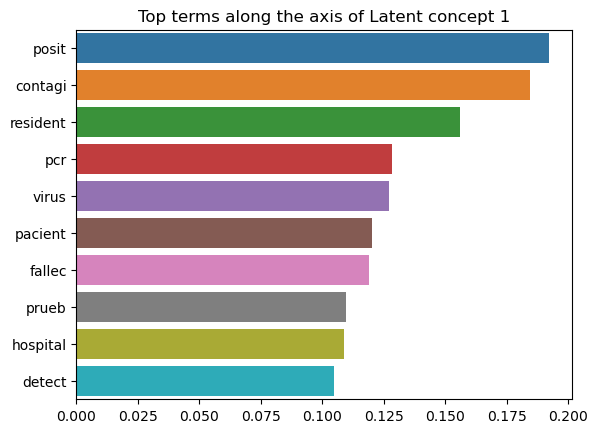

In [38]:
data = term_topic_matrix[f'Latent_concept_1']   # seleccionemos por ejemplo esta columna o tópico: "Latent-Concept".
data = data.sort_values(ascending=False)       # ordenamos lo datos de la columna/tópico seleccionada de manera descendente.

top_10 = data[:10]    # nos quedamos con los 10 pesos de los 10 terms (words) de mayor peso.

plt.title('Top terms along the axis of Latent concept 1')
fig = sns.barplot(x= top_10.values, y=top_10.index)

Estas dos que siguen son opcionales y podrían incluir algunas análogas a estas ... aunque no tiene puntos :-\

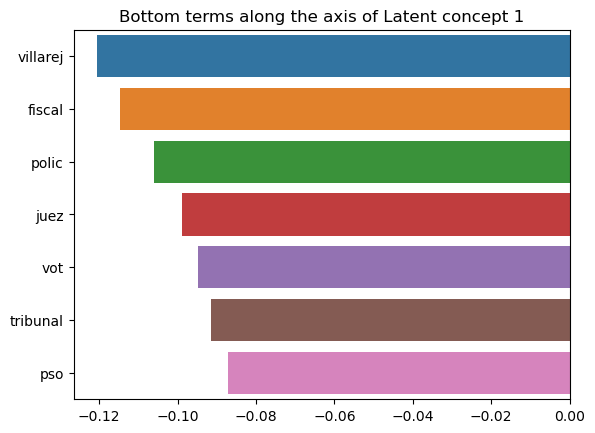

In [39]:
data = data.sort_values(ascending=True)       # ahora los ordenamos de manera ascendente.

top_10 = data[:7]    # nos quedamos con los 10 pesos de los 10 terms (words) de mayor peso.

plt.title('Bottom terms along the axis of Latent concept 1')
fig = sns.barplot(x= top_10.values, y=top_10.index)

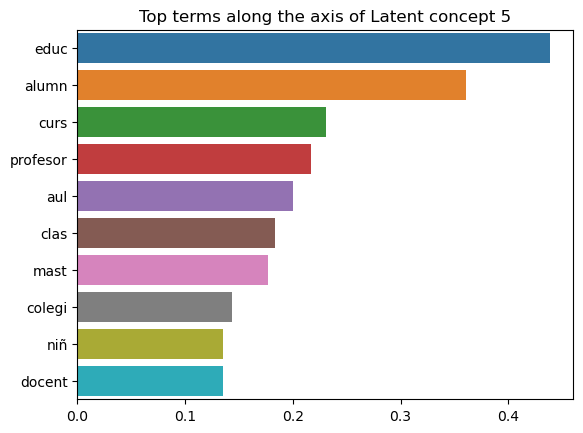

In [40]:
data = term_topic_matrix[f'Latent_concept_5']   # seleccionemos por ejemplo esta columna o tópico: "Latent-Concept".
data = data.sort_values(ascending=False)       # ordenamos lo datos de la columna/tópico seleccionada de manera descendente.

top_10 = data[:10]    # nos quedamos con los 10 pesos de los 10 terms (words) de mayor peso.

plt.title('Top terms along the axis of Latent concept 5')
fig = sns.barplot(x= top_10.values, y=top_10.index)

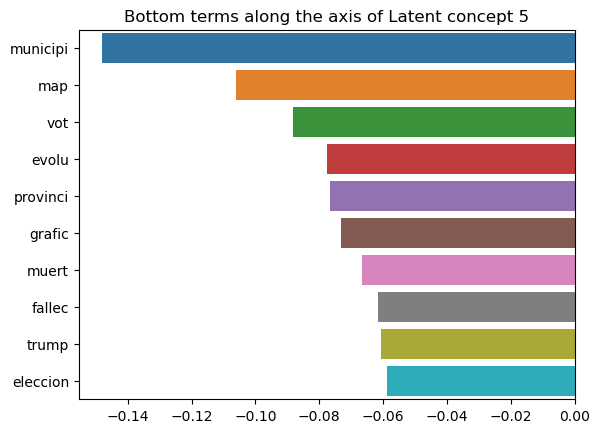

In [41]:
data = data.sort_values(ascending=True)       # ordenamos lo datos de la columna/tópico seleccionada de manera descendente.

top_10 = data[:10]    # nos quedamos con los 10 pesos de los 10 terms (words) de mayor peso.

plt.title('Bottom terms along the axis of Latent concept 5')
fig = sns.barplot(x= top_10.values, y=top_10.index)

# Pregunta - 8:

Para cada uno de los 10 conceptos latentes obtenidos con la descomposición SVD del ejercicio 5, obtener el gráfico de barras que muestre los 10 términos/tokens más importantes de cada uno de ellos.  

NOTA PARA EL PROFESOR: 

      La pregunta 8 la cancelé erróneamente en la ActiveClass de esa semana, porque me preguntaron y me enseñaron
      las preguntas indicándome que era lo mismo y no recordé que eran diferentes en realidad y les dije que la cancelaran. 
      
      En dado caso esta sí podría generar puntos extras, para aquellos equipos que sí la hiciceron.

# Pregunta - 9:

Con base a los resultados del ejercicio anterior, ¿cuántos tópicos o conceptos latentes identificas con claridad? 

¿Cómo los describirías, es decir, de qué temáticas estarían hablando?

<<<< Deben incluir sus comentarios>>>>

# Pregunta - 10:

# LSI

La librería de código abierto Gensim, incluye la implementación de la técnica LSI. 

Ver documentación: https://radimrehurek.com/gensim/models/lsimodel.html 

Investiga la documentación de este modelo LSI en Gensim y aplica dicha técnica a tu conjunto de datos. 

En particular, obtener los modelos de 2 a 10 temas/tópicos y para cada uno de ellos obtener su valor (score) de coherencia.  

Con base a dichos valores, ¿qué cantidad de tópicos sería el adecuado? ¿Coincide con lo que obtuviste previamente, usando la técnica SVD de manera directa?


Además, aprovecharemos para evaluar la cantidad de tópicos generados mediante la métrica de Coherencia. Recuerda que LSI es una técnica no supervisada y no conocemos de antemano la cantidad de tópicos en nuestro corpus.

https://radimrehurek.com/gensim/models/lsimodel.html 

https://radimrehurek.com/gensim/models/coherencemodel.html

In [42]:
from gensim.models import LsiModel
from gensim.models.coherencemodel import CoherenceModel

import gensim
import gensim.corpora as corpora

In [43]:
dictionary = corpora.Dictionary(df['Tokens'])    # generamos el diccionario

In [44]:
# convert corpus into a bag of words:

bow = [dictionary.doc2bow(text) for text in df['Tokens']]

In [55]:
print(bow[2])   # ya tenemos la representación de cada documento en formato (word_id, frecuencia)

[(13, 2), (20, 4), (27, 1), (37, 1), (53, 1), (64, 1), (65, 1), (92, 1), (93, 1), (106, 2), (107, 1), (119, 2), (120, 1), (127, 1), (129, 1), (138, 2), (140, 1), (153, 2), (157, 3), (159, 1), (174, 1), (177, 3), (178, 1), (189, 1), (190, 1), (193, 1), (195, 1), (206, 1), (208, 1), (217, 1), (224, 2), (225, 1), (282, 1), (289, 1), (295, 1), (297, 1), (299, 2), (304, 2), (318, 1), (327, 1), (333, 3), (334, 2), (346, 1), (355, 1), (378, 1), (387, 1), (389, 1), (487, 2), (489, 1), (490, 1), (492, 1), (493, 1), (494, 1), (500, 1), (515, 1), (519, 1), (528, 1), (556, 1), (562, 2), (580, 1), (584, 1), (586, 1), (610, 1), (611, 2), (612, 1), (613, 3), (614, 1), (615, 1), (616, 1), (617, 1), (618, 1), (619, 1), (620, 1), (621, 3), (622, 1), (623, 6), (624, 1), (625, 1), (626, 1), (627, 1), (628, 1), (629, 1), (630, 1), (631, 1), (632, 6), (633, 13), (634, 3), (635, 1), (636, 1), (637, 1), (638, 1), (639, 3), (640, 1), (641, 7), (642, 1), (643, 3), (644, 1), (645, 1), (646, 1), (647, 1), (648, 1

In [45]:
# find the coherence score with a different number of topics:

for i in range(2,11):
    lsi = LsiModel(bow, num_topics=i, id2word=dictionary)
    coherence_model = CoherenceModel(model=lsi, texts=df['Tokens'], dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    print('Coherence score with {} clusters: {}'.format(i, coherence_score))

Coherence score with 2 clusters: 0.38459959790909415
Coherence score with 3 clusters: 0.36490959814843743
Coherence score with 4 clusters: 0.3777236090872181
Coherence score with 5 clusters: 0.4182092825752467
Coherence score with 6 clusters: 0.32086590189714304
Coherence score with 7 clusters: 0.36140590096330777
Coherence score with 8 clusters: 0.3831578574016312
Coherence score with 9 clusters: 0.34300283569256856
Coherence score with 10 clusters: 0.3600147885252509


En este caso obtenemos 5 tópicos como la cantidad de tópicos más adecuada, pero obviamente puede varaiar en cada equipo.

En este caso no coincide del todo con SVD, ya que en ese caso los valores singulares siguen estando bastante grandes todos.

In [46]:
lsi = LsiModel(bow, num_topics=5, id2word=dictionary)

In [47]:
# find the 5 words with the srongest association to the derived topics

for topic_num, words in lsi.print_topics(num_words=5):
    print('Words in {}: {}.'.format(topic_num, words))

Words in 0: 0.229*"cas" + 0.174*"part" + 0.169*"si" + 0.168*"hac" + 0.167*"pued".
Words in 1: 0.223*"part" + -0.213*"coronavirus" + -0.209*"person" + -0.204*"cas" + 0.200*"polit".
Words in 2: -0.472*"cas" + 0.185*"trabaj" + 0.169*"pued" + -0.168*"pp" + 0.163*"hac".
Words in 3: 0.335*"gobiern" + -0.264*"cas" + 0.147*"part" + -0.146*"investig" + -0.141*"muj".
Words in 4: 0.289*"trabaj" + 0.183*"empres" + -0.171*"non" + 0.170*"investig" + -0.169*"pais".


Tal vez en este caso truncamos demasiado con SnowBall y no se entienden bien algunas de las palabras...

# Parte 2: Asignación de Dirichlet Latente (LDA):

# Pregunta - 11:

Utiliza la librería Gensim para implementar ahora la técnica de LDA. 

Revisa la documentación correspondiente y aplica de preferencia el modelo paralelizable:

https://radimrehurek.com/gensim/models/ldamodel.html 

https://radimrehurek.com/gensim/models/ldamulticore.html 


De lo anterior, tenemos que 5 o 10 son las cantidades de tópicos adecuadas.

Calculemos por el momento cada una por separado y veamos.

Se tarda cada uno no más de 3 mins aprox:

In [68]:
# Con 5 tópicos...

lda_model5 = gensim.models.LdaMulticore(corpus=bow,
                    id2word=dictionary,
                    num_topics=5,      # total de tópicos que deseas buscar...
                    chunksize=5,    # número de documentos a analizar en cada chunk de entrenamiento
                    passes=10,        # número de pasadas al corpus durante el entrenamiento.
                    alpha=0.2,        # alfa: similaridad document-topics
                    eta=0.2,         # beta: similaridad topic-words      
                    )

In [69]:
lda_model5.print_topics(num_topics=5, num_words=6)

[(0,
  '0.013*"gobiern" + 0.013*"part" + 0.011*"polit" + 0.009*"pp" + 0.008*"pod" + 0.008*"president"'),
 (1,
  '0.007*"hac" + 0.005*"muj" + 0.005*"años" + 0.004*"sol" + 0.004*"ser" + 0.004*"pas"'),
 (2,
  '0.010*"cas" + 0.008*"investig" + 0.006*"inform" + 0.005*"polic" + 0.005*"public" + 0.005*"dos"'),
 (3,
  '0.011*"trabaj" + 0.010*"empres" + 0.009*"eur" + 0.008*"econom" + 0.008*"millon" + 0.006*"contrat"'),
 (4,
  '0.012*"coronavirus" + 0.012*"cas" + 0.009*"person" + 0.007*"pued" + 0.007*"comun" + 0.007*"inform"')]

In [73]:
# Con 10 tópicos... habría que también hacer un fine-tuning de búsqueda de mejores hiperparámetros...

lda_model10 = gensim.models.LdaMulticore(corpus=bow,
                    id2word=dictionary,
                    num_topics=10,      # total de tópicos que deseas buscar...
                    chunksize=5,    # número de documentos a analizar en cada chunk de entrenamiento
                    passes=10,        # número de pasadas al corpus durante el entrenamiento.
                    alpha=0.2,        # alfa: similaridad document-topics  ... valores más pequeños, menos tópicos por docs
                    eta=0.2,         # beta: similaridad topic-words ... valores más pequeños, menos tokens por tópico    
                    )

In [74]:
lda_model10.print_topics(num_topics=10, num_words=6)

[(0,
  '0.026*"cas" + 0.016*"coronavirus" + 0.013*"person" + 0.011*"cov" + 0.010*"dat" + 0.009*"nuev"'),
 (1,
  '0.011*"hac" + 0.007*"si" + 0.007*"pued" + 0.007*"muj" + 0.006*"ser" + 0.006*"sol"'),
 (2,
  '0.011*"europ" + 0.008*"econom" + 0.007*"pais" + 0.006*"millon" + 0.006*"canari" + 0.005*"españ"'),
 (3,
  '0.011*"unid" + 0.009*"pais" + 0.009*"trump" + 0.008*"the" + 0.007*"israel" + 0.006*"president"'),
 (4,
  '0.016*"trabaj" + 0.011*"coronavirus" + 0.010*"pued" + 0.008*"med" + 0.008*"si" + 0.007*"inform"'),
 (5,
  '0.015*"part" + 0.015*"gobiern" + 0.013*"polit" + 0.011*"pp" + 0.009*"pod" + 0.008*"president"'),
 (6,
  '0.022*"madr" + 0.013*"comun" + 0.010*"gobiern" + 0.010*"centr" + 0.009*"educ" + 0.009*"consej"'),
 (7,
  '0.017*"eur" + 0.013*"euskadi" + 0.012*"vasc" + 0.010*"millon" + 0.010*"empres" + 0.010*"contrat"'),
 (8,
  '0.007*"histori" + 0.007*"guerr" + 0.005*"pelicul" + 0.005*"cin" + 0.004*"libr" + 0.004*"prim"'),
 (9,
  '0.012*"cas" + 0.011*"investig" + 0.008*"inform" + 

# Pregunta - 12:

Con base a esta técnica ¿qué cantidad de tópicos consideras que es la más adecuada? 

Compara tus resultados con el método LSI. 

¿Qué encuentras de coincidencias y diferencias? 

¿Cuál consideras puede ser el mejor resultado, es decir, cuál consideras puede ser la mejor cantidad de tópicos a considerar?

Se observan varios tokens en común entre cada tema, habría que hacer tal vez un ajuste del parámetro beta...

Igualmente ver lo que obtengan y analicen los estudiantes...

# Pregunta - 13:

La librería pyLDAvis nos ayuda a visualizar de manera interactiva los temas y tokens de los documentos analizados. 

Revisa la documentación y utilízala para visualizar tu mejor resultado.

https://pypi.org/project/pyLDAvis/  


In [78]:
!python -m pip install -U pyLDAvis

In [79]:
# Plotting tools
import pyLDAvis
import pyLDAvis.gensim 

pyLDAvis.enable_notebook()

import matplotlib.pyplot as plt

Por simplicidad usaré el caso de 5 tópicos, pero cada equipo debe seleccionar su mejor caso:

In [80]:
# solo requerimos el modelo-LDA, el corpus (diccionario idx-freq) y el diccionario id2word
vis = pyLDAvis.gensim.prepare(lda_model5, bow, dictionary)

vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.062973  0.152843       1        1  27.570297
4     -0.122469  0.026043       2        1  21.699122
0      0.053082 -0.014309       3        1  18.256141
2      0.119787 -0.104368       4        1  16.689697
3     -0.113373 -0.060209       5        1  15.784743, topic_info=             Term          Freq         Total Category  logprob  loglift
289   coronavirus   6796.000000   6796.000000  Default  30.0000  30.0000
1439       empres   4290.000000   4290.000000  Default  29.0000  29.0000
1445          eur   4281.000000   4281.000000  Default  28.0000  28.0000
387       gobiern  10660.000000  10660.000000  Default  27.0000  27.0000
151            pp   4991.000000   4991.000000  Default  26.0000  26.0000
...           ...           ...           ...      ...      ...      ...
297           deb   1165.762003   6007.244433   Topic5  -5.8549   0.2065
444         mayor   1144.679699   5873.585134   Topic5  -5.8732   0.2108
518          pued   1221.764992  10281.733073   Topic5  -5.8080  -0.2839
673        inform   1121.890910   8058.197007   Topic5  -5.8933  -0.1255
1084         soci   1105.793473   7511.156489   Topic5  -5.9078  -0.0697

[434 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
5496      3  0.993394         10n
0         3  0.997657     abascal
4376      3  0.995777  abstencion
748       1  0.108457       activ
748       2  0.411616       activ
...     ...       ...         ...
2006      5  0.949470     viviend
199       3  0.999575         vot
4097      3  0.997213    votacion
2917      3  0.996898      votant
200       3  0.999147         vox

[983 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 5, 1, 3, 4])

Vemos que con 5 están bastante independinetes cada tópico y está bien, para un caso basntante genérico.

Pero tal vez podría intentarse con valores más grandes, en particular el de 10 tópicos...

# Pregunta - 14:

<<<< Incluyen sus concluiones finales >>>>